### Task 2
#### life_timeについて、materialの中ではmaterial Cは長く、material Dは短い傾向にある
#### life_time 
#### material C中では、直径が大きいものの寿命は短く、直径が小さいものの寿命は長い
#### 他のmaterialについては直径と寿命との依存性はみられない

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# データの読み込み、故障のないデータを削除
df = pd.read_csv("fracta_Dec3.csv")
df = df[~df["break_year"].isna()]
df["life_time"] = df["break_year"] - df["install_year"]
pd.set_option('display.max_columns', 151)
df

,pipe_id,install_year,material,diameter,break_year,env_dat_0,env_dat_1,env_dat_2,env_dat_3,env_dat_4,env_dat_5,env_dat_6,env_dat_7,env_dat_8,env_dat_9,env_dat_10,env_dat_11,env_dat_12,env_dat_13,env_dat_14,env_dat_15,env_dat_16,env_dat_17,env_dat_18,env_dat_19,env_dat_20,env_dat_21,env_dat_22,env_dat_23,env_dat_24,env_dat_25,env_dat_26,env_dat_27,env_dat_28,env_dat_29,env_dat_30,env_dat_31,env_dat_32,env_dat_33,env_dat_34,env_dat_35,env_dat_36,env_dat_37,env_dat_38,env_dat_39,env_dat_40,env_dat_41,env_dat_42,env_dat_43,env_dat_44,env_dat_45,env_dat_46,env_dat_47,env_dat_48,env_dat_49,env_dat_50,env_dat_51,env_dat_52,env_dat_53,env_dat_54,env_dat_55,env_dat_56,env_dat_57,env_dat_58,env_dat_59,env_dat_60,env_dat_61,env_dat_62,env_dat_63,env_dat_64,env_dat_65,env_dat_66,env_dat_67,env_dat_68,env_dat_69,env_dat_70,env_dat_71,env_dat_72,env_dat_73,env_dat_74,env_dat_75,env_dat_76,env_dat_77,env_dat_78,env_dat_79,env_dat_80,env_dat_81,env_dat_82,env_dat_83,env_dat_84,env_dat_85,env_dat_86,env_dat_87,env_dat_88,env_dat_89,env_dat_90,env_dat_91,env_dat_92,env_dat_93,env_dat_94,env_dat_95,env_dat_96,env_dat_97,env_dat_98,env_dat_99,env_dat_100,env_dat_101,env_dat_102,env_dat_103,env_dat_104,env_dat_105,env_dat_106,env_dat_107,env_dat_108,env_dat_109,env_dat_110,env_dat_111,env_dat_112,env_dat_113,env_dat_114,env_dat_115,env_dat_116,env_dat_117,env_dat_118,env_dat_119,env_dat_120,env_dat_121,env_dat_122,env_dat_123,env_dat_124,env_dat_125,env_dat_126,env_dat_127,env_dat_128,env_dat_129,env_dat_130,env_dat_131,env_dat_132,env_dat_133,env_dat_134,env_dat_135,env_dat_136,env_dat_137,env_dat_138,env_dat_139,env_dat_140,env_dat_141,env_dat_142,env_dat_143,env_dat_144,life_time
41,P0000000041,1983,D,20.32,1990.0,568.710022,17.559999,14.100000,10.640000,0.023671,0.000005,0.004531,0.000043,0.004607,0.016197,0.000202,0.000202,0.000043,0.000202,0.03,0.002177,0.000159,0.005814,0.03,0.030000,0.030000,0.03,0.030000,0.03,0.030000,0.03,0.03,0.030000,7.075000,0,11.625000,3.000000,7.125000,3.000000,3.250000,30.125000,32.375000,36.375000,0,0,1.500000,309.750000,0.687500,0.092500,0.000000,0.000000,0.000000,4.320000,27.049999,14.700000,4.727500,0.280000,0.250000,4.500000,0,41.250000,56.000000,38.229683,36.955715,79.622345,-15.719101,14.731598,3.865038,3.933964,6.098180,4.337155,1.172846,0.0,0.0,0.0,0.0,313.319519,11.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,149.336197,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,313.319519,11.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,149.336197,6.000000,0.000000,0.000000,0.0,0.0,462.655731,17.000000,64.451736,2302.071777,5.000000,3799.932617,0.000505,0.383964,0.0,0.0,7.0
52,P0000000052,1968,D,20.32,1995.0,580.960022,18.260000,14.340000,10.420000,299.776337,0.037117,0.012299,0.001423,0.012844,0.019770,0.005945,0.005945,0.000577,0.007043,0.03,0.003505,0.000000,0.014778,0.03,0.030000,0.030000,0.03,0.030000,0.03,0.030000,0.03,0.03,0.030000,6.600000,0,15.500000,0.000000,9.500000,1.500000,9.000000,23.500000,41.400002,33.599998,0,0,1.500000,300.000000,1.250000,0.140000,3.750000,7.340000,14.290000,16.700001,27.049999,14.700000,4.500000,0.280000,0.240000,4.000000,0,35.000000,56.000000,60.020226,60.479877,79.578178,37.128906,11.017604,5.374810,5.579060,3.945909,4.945361,0.480785,0.0,0.0,0.0,0.0,424.578217,14.987097,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,66.106216,0.995699,23.323256,0.497850,0.0,0.0,100.745728,2.004301,0.000000,0.000000,127.959442,2.497849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,424.578217,14.987097,0.000000,0.0,0.000000,0.000000,23.323256,0.497850,127.959442,2.497849,0.000000,0.000000,0.0,0.0,742.712830,20.982796,7.289519,982.682190,19.008602,4485.814941,0.001921,0.453269,0.0,1.0,27.0
63,P0000000063,1991,D,10.16,2003.0,615.322571

In [52]:
# 環境変数が全て0のcolumnを削除、idをリセット
for column in df.columns:
    if (df[column] == df[column][41]).all():
        df = df.drop(column, axis=1)
df = df.reset_index(drop=True)
df

,pipe_id,install_year,material,diameter,break_year,env_dat_0,env_dat_1,env_dat_2,env_dat_3,env_dat_4,env_dat_5,env_dat_6,env_dat_7,env_dat_8,env_dat_9,env_dat_10,env_dat_11,env_dat_12,env_dat_13,env_dat_15,env_dat_16,env_dat_17,env_dat_19,env_dat_20,env_dat_22,env_dat_24,env_dat_27,env_dat_28,env_dat_30,env_dat_31,env_dat_32,env_dat_33,env_dat_34,env_dat_35,env_dat_36,env_dat_37,env_dat_40,env_dat_41,env_dat_42,env_dat_43,env_dat_44,env_dat_45,env_dat_46,env_dat_47,env_dat_48,env_dat_49,env_dat_50,env_dat_51,env_dat_52,env_dat_53,env_dat_55,env_dat_56,env_dat_57,env_dat_58,env_dat_59,env_dat_60,env_dat_61,env_dat_62,env_dat_63,env_dat_64,env_dat_65,env_dat_66,env_dat_69,env_dat_70,env_dat_71,env_dat_72,env_dat_73,env_dat_74,env_dat_75,env_dat_76,env_dat_77,env_dat_78,env_dat_79,env_dat_80,env_dat_81,env_dat_82,env_dat_83,env_dat_84,env_dat_85,env_dat_86,env_dat_87,env_dat_88,env_dat_89,env_dat_90,env_dat_91,env_dat_92,env_dat_93,env_dat_94,env_dat_95,env_dat_96,env_dat_97,env_dat_98,env_dat_99,env_dat_100,env_dat_105,env_dat_106,env_dat_109,env_dat_110,env_dat_111,env_dat_112,env_dat_113,env_dat_114,env_dat_115,env_dat_116,env_dat_117,env_dat_118,env_dat_121,env_dat_122,env_dat_123,env_dat_124,env_dat_125,env_dat_126,env_dat_127,env_dat_128,env_dat_129,env_dat_130,env_dat_131,env_dat_132,env_dat_133,env_dat_134,env_dat_135,env_dat_136,env_dat_137,env_dat_138,env_dat_139,env_dat_140,env_dat_141,env_dat_142,env_dat_143,env_dat_144,life_time
0,P0000000041,1983,D,20.32,1990.0,568.710022,17.559999,14.100000,10.640000,0.023671,0.000005,0.004531,0.000043,0.004607,0.016197,0.000202,0.000202,0.000043,0.000202,0.002177,0.000159,0.005814,0.030000,0.030000,0.030000,0.030000,0.030000,7.075000,11.625000,3.000000,7.125000,3.000000,3.250000,30.125000,32.375000,36.375000,1.500000,309.750000,0.687500,0.092500,0.000000,0.000000,0.000000,4.320000,27.049999,14.700000,4.727500,0.280000,0.250000,4.500000,41.250000,56.000000,38.229683,36.955715,79.622345,-15.719101,14.731598,3.865038,3.933964,6.098180,4.337155,1.172846,0.0,0.0,313.319519,11.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,149.336197,6.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,313.319519,11.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,149.336197,6.000000,0.000000,0.000000,0.0,0.0,462.655731,17.000000,64.451736,2302.071777,5.000000,3799.932617,0.000505,0.383964,0.0,0.0,7.0
1,P0000000052,1968,D,20.32,1995.0,580.960022,18.260000,14.340000,10.420000,299.776337,0.037117,0.012299,0.001423,0.012844,0.019770,0.005945,0.005945,0.000577,0.007043,0.003505,0.000000,0.014778,0.030000,0.030000,0.030000,0.030000,0.030000,6.600000,15.500000,0.000000,9.500000,1.500000,9.000000,23.500000,41.400002,33.599998,1.500000,300.000000,1.250000,0.140000,3.750000,7.340000,14.290000,16.700001,27.049999,14.700000,4.500000,0.280000,0.240000,4.000000,35.000000,56.000000,60.020226,60.479877,79.578178,37.128906,11.017604,5.374810,5.579060,3.945909,4.945361,0.480785,0.0,0.0,424.578217,14.987097,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,66.106216,0.995699,23.323256,0.497850,0.0,0.0,100.745728,2.004301,0.000000,0.000000,127.959442,2.497849,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,424.578217,14.987097,0.000000,0.0,0.000000,0.000000,23.323256,0.497850,127.959442,2.497849,0.000000,0.000000,0.0,0.0,742.712830,20.982796,7.289519,982.682190,19.008602,4485.814941,0.001921,0.453269,0.0,1.0,27.0
2,P0000000063,1991,D,10.16,2003.0,615.322571,18.112228,14.210916,10.309492,105.444649,0.010701,0.030000,0.000640,0.013378,0.030000,0.000843,0.017290,0.005855,0.006950,0.003523,0.000834,0.030000,0.026742,0.030000,0.024637,0.030000,0.030000,6.200000,10.250000,0.000000,9.500000,1.500000,22.000000,13.000000,68.699997,17.549999,1.575000,318.750000,1.437500,0.100000,1.500000,3.000000,6.000000,9.000000,18.950001,9.575000,48.250000,0.1

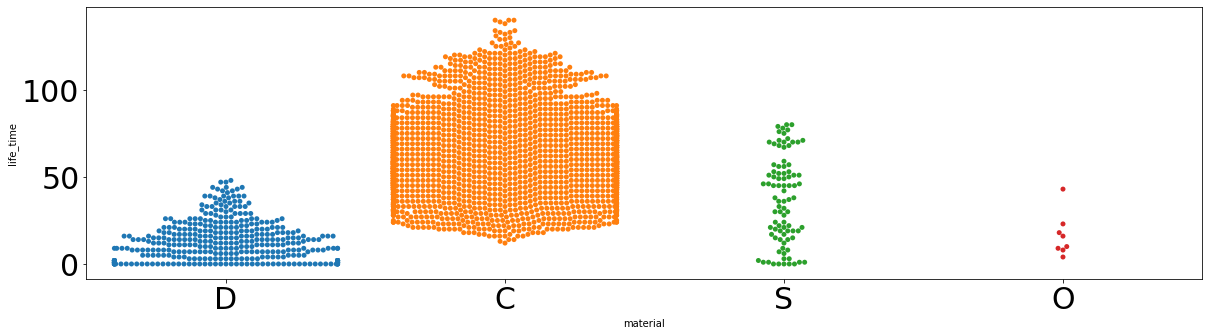

In [53]:
# 材料と寿命の関係を可視化
fig, ax = plt.subplots(figsize=(20, 5))
ax.tick_params(labelsize=30)
sns.swarmplot(ax=ax, x="material", y="life_time", data=df)

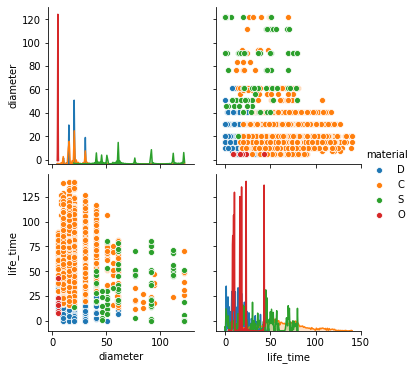

In [55]:
# 直径と寿命の関係を、材料をhueとし可視化
sns.pairplot(df[["diameter", "life_time", "material"]], hue="material", kind="scatter" , diag_kws={'bw': 0.2})

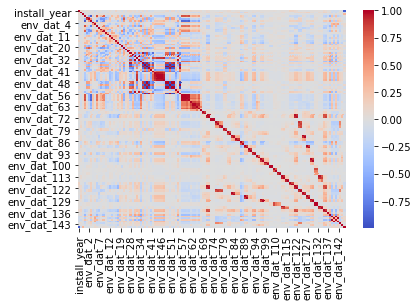

In [47]:
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm")